In [1]:
# Libraries
## Mathematics
import numpy as np
from scipy.stats import rv_discrete, rv_continuous, norm
from scipy.integrate import quad
from scipy.interpolate import interp1d
import random

## Visualization
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

In [2]:
# Load functions .py files
from Theoretical_boundaries_visualization_functions import optimal_stopping_Brownian_bridge, normal_boundary_ABEL, normal_boundary_EDUARDO
from Checking_simulated_boundary_functions import h_definition, spatial_grid, simulate_process, value_function_first_step, v_expectance, optimal_stopping_montecarlo

C:\Users\User\Documents\GitHub\Optimal-stopping-of-a-Brownian-bridge-with-a-random-pinning-point\Checking_simulated_boundary_functions.py:82: SyntaxWarning: invalid escape sequence '\D'
  """
C:\Users\User\Documents\GitHub\Optimal-stopping-of-a-Brownian-bridge-with-a-random-pinning-point\Checking_simulated_boundary_functions.py:108: SyntaxWarning: invalid escape sequence '\D'
  """
C:\Users\User\Documents\GitHub\Optimal-stopping-of-a-Brownian-bridge-with-a-random-pinning-point\Checking_simulated_boundary_functions.py:136: SyntaxWarning: invalid escape sequence '\D'
  """


# Initialize distributions

In [3]:
# Initialize distributions
## Dirac delta
r = 0

dirac_delta_distribution = rv_discrete(name = 'Delta Dirac', values = (np.array([r]), np.array([1])))

## Normal
mean = 0
sigma = 1/2

class Normal(rv_continuous):
    def _pdf(self, x):
        return 1/(sigma*np.sqrt(2*np.pi))*np.exp(-0.5*((x - mean)/sigma)**2)

normal_distribution = Normal(name = "normal", a = -np.inf, b = np.inf)

## Uniform
lower_bound = 0
upper_bound = 1

class Uniform(rv_continuous):
    def _pdf(self, x):
        return 1/(upper_bound - lower_bound)

uniform_distribution = Uniform(name = "uniform", a = lower_bound, b = upper_bound)

## Exponential
lambda_param = 1

class Exponential(rv_continuous):
    def _pdf(self, x):
        return lambda_param*np.exp(-lambda_param*x)

exponential_distribution = Exponential(name = "exponential", a = 0, b = np.inf)

# Exact optimal stopping boundary for a Dirac Delta distribution

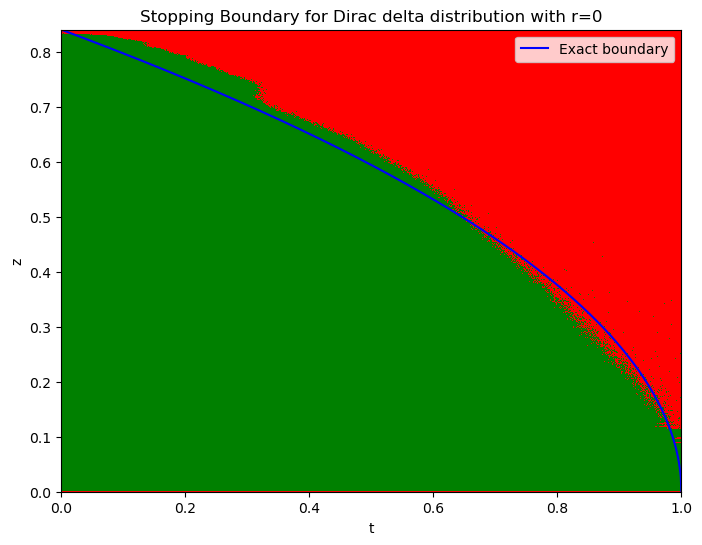

In [4]:
# Pinning point
r = 0

# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh)

# Boundary
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)
np.random.seed(123)
L = 1000
value_function, X_vals = optimal_stopping_montecarlo(mu = dirac_delta_distribution, N = mesh, M = 5000 , L = L, m = 0, gamma = 0)

# Plotting
if mesh != L:
  # Adjust meshgrid for different dimensions
  T, X = np.meshgrid(t_mesh, np.linspace(np.min(X_vals), np.max(X_vals), L))  # Se usa L para que coincida con value_function

  # Interpolar value_function para ajustarlo a `t_mesh`
  interp_func = interp1d(np.linspace(0, 1, mesh), value_function, axis=0, kind='linear', fill_value="extrapolate")
  value_function_interp = interp_func(t_mesh)  # Ahora tiene forma (mesh, L) = (10,100)

  # Ajustar X_vals para que coincida con value_function_interp
  X_grid = np.linspace(np.min(X_vals), np.max(X_vals), L)  # Generar L valores
  comparison = value_function_interp <= np.tile(X_grid, (mesh, 1))  # Ahora ambas matrices tienen (10,100)

  # Definir colores
  cmap = mcolors.ListedColormap(['green', 'red'])

  # Visualización
  plt.figure(figsize=(8, 6))
  plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
  plt.pcolormesh(T, X, comparison.T, cmap=cmap, shading='auto')
  plt.xlabel("t")
  plt.ylabel("z")
  plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
  plt.legend()
  plt.xlim(0, 1)
  plt.ylim(np.min(X_vals), np.max(X_vals))
  plt.show()

else:
  T, X = np.meshgrid(t_mesh, X_vals)

  comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1))  # Genera una matriz booleana
  colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
  cmap = plt.cm.colors.ListedColormap(['green', 'red'])

  # Visualization
  plt.figure(figsize=(8, 6))
  plt.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
  plt.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
  plt.xlabel("t")
  plt.ylabel("z")
  plt.title(f"Stopping Boundary for Dirac delta distribution with r={r}")
  plt.legend()
  plt.xlim(0, 1)
  plt.ylim(np.min(X_vals), np.max(X_vals))
  plt.show()

# Theoretical optimal stopping boundary for a Normal distribution with standard deviation lower than 1

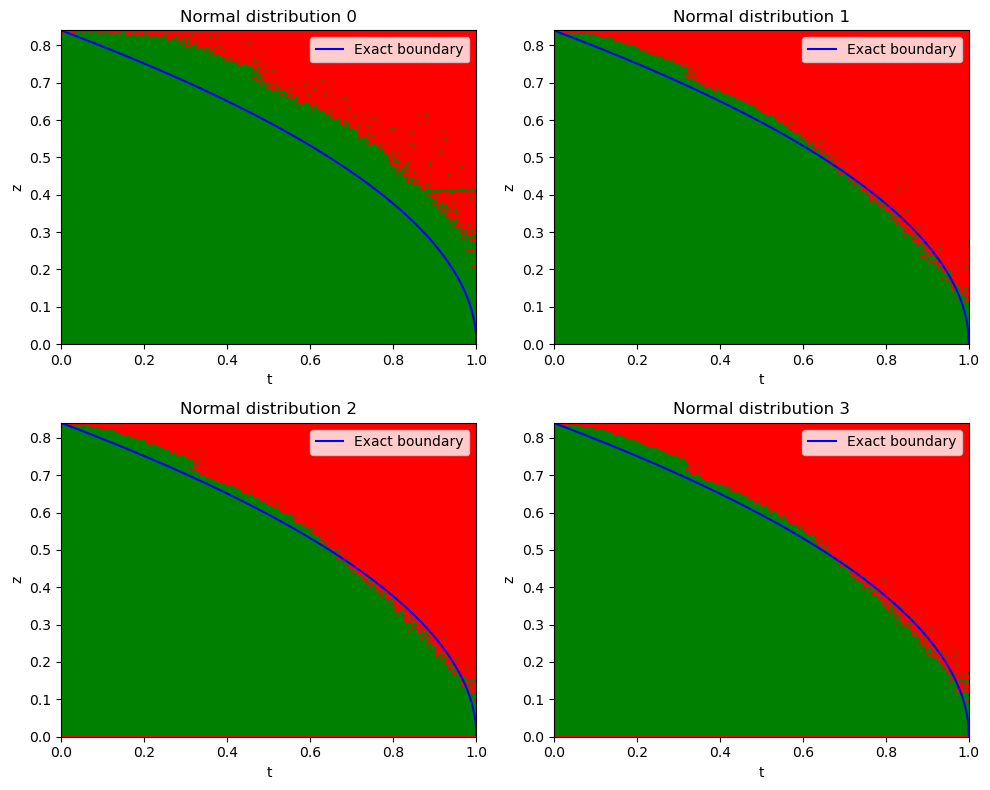

In [5]:
# t mesh
mesh = 1000
t_mesh = np.linspace(0, 1, mesh)

# Exact BB
r = 0
exact_boundary = optimal_stopping_Brownian_bridge(t_mesh, r)

# Normal distributions
desv_tipic = [1/2, 1/10, 1/100, 1/1000]

# Crear figura 2x2
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for i, sd in enumerate(desv_tipic):
  mean = 0
  sigma = sd

  class Normal(rv_continuous):
    def _pdf(self, x):
        return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / sigma) ** 2)

    def _rvs(self, size=None, random_state=None):
        return random_state.normal(loc=mean, scale=sigma, size=size)

  # Keep the limits as infinite
  normal_distribution = Normal(name="normal", a=-np.inf, b=np.inf)

  np.random.seed(123)
  value_function, X_vals = optimal_stopping_montecarlo(mu = dirac_delta_distribution, N = mesh, M = 5000 , L = mesh, m = mean, gamma= sd)
  T, X = np.meshgrid(t_mesh, X_vals)

  comparison = value_function <= np.tile(X_vals, (len(t_mesh), 1))  # Genera una matriz booleana
  colors = np.where(comparison, 1, 0)  # 1 for True (red), 0 for False (green))
  cmap = plt.cm.colors.ListedColormap(['green', 'red'])

  # Visualization
  ax = axes[i // 2, i % 2]  # Seleccionar subgráfico
  ax.plot(t_mesh, exact_boundary, 'b-', label="Exact boundary")
  ax.pcolormesh(T, X, comparison, cmap=cmap, shading='auto')
  ax.set_xlabel("t")
  ax.set_ylabel("z")
  ax.set_title(f"Normal distribution {i}")
  ax.legend()
  ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()